> To live! like a tree alone and free,
> and like a forest in brotherhood/sisterhood...
> Nazim Hikmet

<center> <h1> Random Forests (Yes! No Forest Image) </h1> </center>



## Objectives

- Review of decision trees

- Defining Bootstrapping process

- Explaining the need for bootstrapping

- Identifying the need for bootstrapping for decision trees.

- Comparing Random forests and bagging methods

- Evaulating a model by random forest model

<center> <h1> Bootstrapping </h1> </center>

<img src= "img/bootstrapping2.jpg" style="height:400px">


Consider a case that we want to invest to either X or Y a fixed amount of money.

- $\alpha$ amount to X and $1- \alpha$ amount to Y

- We want to minimize variance in our investment! This is minimize $V(\alpha X + (1-\alpha )Y)$

- The $\alpha$ that minimizes the variance: 

$$ \alpha = \frac{\sigma^{2}_{Y} - \sigma_{XY}}{\sigma_{X}^{2} + \sigma^{2}_{Y} - 2\sigma_{XY}}$$

where $\sigma_{XY}$ is the covariance of X and Y. 

Q: Do you see the problem here?

Hint: Let's rewrite the equation with hats! What are the hats refering to ?


$$ \widehat{\alpha}= \frac{\widehat{\sigma}^{2}_{Y} - \widehat{\sigma}_{XY}}{\widehat{\sigma}_{X}^{2} + \widehat{\sigma}^{2}_{Y} - 2\widehat{\sigma}_{XY}}$$

Q: How much do we certain about $\widehat{\alpha}$?


can random forest overfit?

In [13]:
import numpy as np

In [14]:
sample = np.random.multivariate_normal(mean = [10,10], cov = [[1, 0.5], [0.5, 1.25]] , size = 100)
# variance and covariance of x and y

In [15]:
a = (1.25 - 0.5) / (1 + 1.25 - 2 * 0.5)
print(a)

0.6


In [17]:
sigma_x = sample[:,0].var()

sigma_y = sample[:,1].var()

sigma_xy = np.cov(sample.T)[0,1]

print(np.cov(sample.T))

alpha_hat = (sigma_y - sigma_xy)/(sigma_x + sigma_y - 2* sigma_xy)

print(alpha_hat)

[[0.88647298 0.46468315]
 [0.46468315 1.21672737]]
0.6418074542683302


In [20]:
alphas = []

for i in range(200):
    sample = np.random.multivariate_normal(mean = [10,10], cov = [[1, 0.5], [0.5, 1.25]] , size = 100)
    sample_x = sample[:,0].var()
    sample_y = sample[:,1].var()
    sample_xy = np.cov(sample.T)[0,1]
    a_hat = (sample_y - sample_xy)/(sample_x + sample_y - 2* sample_xy)
    alphas.append(a_hat)

In [26]:
import matplotlib.pyplot as plt

(array([ 5.,  3.,  8., 28., 34., 49., 37., 21.,  9.,  6.]),
 array([0.34818519, 0.39525418, 0.44232317, 0.48939216, 0.53646114,
        0.58353013, 0.63059912, 0.6776681 , 0.72473709, 0.77180608,
        0.81887507]),
 <a list of 10 Patch objects>)

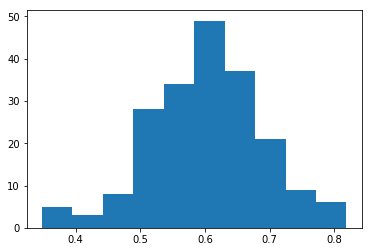

In [27]:
plt.hist(alphas)

In [28]:
np.std(alphas)

0.08680200360581684

In [29]:
np.std(alphas, ddof=1)

0.08701982578921985

In [30]:
alphas = []

for i in range(1000):
    s = np.random.multivariate_normal(mean = [10,10], cov = [[1, 0.5], [0.5, 1.25]] , size = 100)
    s_x = s[:,0].var()
    s_y = s[:,1].var()
    s_xy = np.cov(s.T)[0,1]
    a_hat = (s_y - s_xy)/(s_x + s_y - 2* s_xy)
    alphas.append(a_hat)
    


In [31]:
np.std(alphas, ddof=1)

0.08026281217990565

not practical!, cannot keep resampling from population and taking survey.
for example 1000 people take survey, it's better 100 people and ten times

In [ ]:
# find the mean of the alphas
# find the standard error of alphas - note that the degree of freedom is 1 in this case

Q: what is wrong with this approach?

A: What can we do about this -- Bootstapping 


In [32]:
## Bootstrapping

boot_sample = sample[np.random.choice(np.arange(100), replace = True, size = 100)]

np.unique(boot_sample, return_counts= True, axis = 0)[1]

## Homework: find alpha_hats with bootstrapping

array([2, 2, 2, 1, 1, 1, 1, 3, 2, 2, 1, 2, 1, 2, 1, 1, 1, 2, 2, 1, 2, 5,
       1, 3, 2, 3, 4, 1, 2, 1, 1, 1, 2, 1, 2, 3, 1, 1, 1, 1, 2, 1, 1, 1,
       1, 1, 2, 1, 1, 1, 1, 1, 1, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [33]:
np.unique(boot_sample, return_counts= True, axis = 0)[1].shape
# usually takes 2/3
# if do experiment again and again, waste time and money!
# bootstrapping can acchieve almost same result

(66,)

bootstrapping: take and then replace
random.choice can only take 1-d array

In [36]:
boot_sample = sample[np.random.choice(np.arange(100), replace = True, size = 100)]
# np.arrange, give 100 numbers
# np.unique(boot_sample, return_counts= True, axis = 0)[1]

In [44]:
alphas = []

for i in range(1000):
    s = boot_sample = sample[np.random.choice(np.arange(100), replace = True, size = 100)]
    s_x = s[:,0].var()
    s_y = s[:,1].var()
    s_xy = np.cov(s.T)[0,1]
    a_hat = (s_y - s_xy)/(s_x + s_y - 2* s_xy)
    alphas.append(a_hat)
    
# choose randomly, 100 numbers from 1000, replace = true

In [45]:
np.mean(alphas)
# variance in the sample mean

0.5859392193077552

In [46]:
np.std(alphas,ddof=1)

0.07180750159335185

<img src= "img/bootstrap1.png" style="height:400px">


### Bagging


Let's us one more time recall that if $Z_{1}, \cdots, Z_{n}$ are independent observations with variance $\sigma^{2}$ then the variance of the mean $\bar{Z}$ is given by $\frac{\sigma^{2}}{n}$. 

So what?

We will use this idea calculate $$ \hat{f}^{1}(x), \cdots, \hat{f}^{B}(x)$$ where each $\hat{f}^{i}$ represents a decision tree fitted to the bootstrapped data.


Then we will make a prediction by: 

$$ \hat{f}_{\text{avg}}(x) = \frac{1}{B}\sum_{b=1}^{B} \hat{f}^{b}(x)$$

Note that this is for regression and for the classification we can get majority vote.

__Problem__ We still have some problem with this approach and random forests will address this problem. Can you see the issue?

- If we have a strong predictor then this will dominate in each tree.





- variance of the mean gets smaller when n gets bigger
- decision tree: high variance, overfits; so we want to cut the variance

- low bias, high variance --> decision tree
- low variance, high bias --> linear

- issue in bagging: strong predictor
- solution: choose random features, random columns

In [47]:
import pandas as pd

In [48]:
## you can download the data from -- https://www.kaggle.com/ishaanv/ISLR-Auto#Heart.csv

## or http://faculty.marshall.usc.edu/gareth-james/ISL/data.html
heart = pd.read_csv('data/Heart.csv', index_col = 0)

In [49]:
heart.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 303 entries, 1 to 303
Data columns (total 14 columns):
Age          303 non-null int64
Sex          303 non-null int64
ChestPain    303 non-null object
RestBP       303 non-null int64
Chol         303 non-null int64
Fbs          303 non-null int64
RestECG      303 non-null int64
MaxHR        303 non-null int64
ExAng        303 non-null int64
Oldpeak      303 non-null float64
Slope        303 non-null int64
Ca           299 non-null float64
Thal         301 non-null object
AHD          303 non-null object
dtypes: float64(2), int64(9), object(3)
memory usage: 35.5+ KB


In [50]:
heart.head()

,Age,Sex,ChestPain,RestBP,Chol,Fbs,RestECG,MaxHR,ExAng,Oldpeak,Slope,Ca,Thal,AHD
1,63,1,typical,145,233,1,2,150,0,2.3,3,0.0,fixed,No
2,67,1,asymptomatic,160,286,0,2,108,1,1.5,2,3.0,normal,Yes
3,67,1,asymptomatic,120,229,0,2,129,1,2.6,2,2.0,reversable,Yes
4,37,1,nonanginal,130,250,0,0,187,0,3.5,3,0.0,normal,No
5,41,0,nontypical,130,204,0,2,172,0,1.4,1,0.0,normal,No


why random forest??

resilient to curse of dimentional, 
hypoparameter, 

In [53]:
heart.dropna(axis= 0, how= 'any', inplace = True)

y = heart.AHD

heart.drop(columns= 'AHD', inplace = True)

In [54]:
X = pd.get_dummies(heart)

In [65]:
X.head()

,Age,Sex,RestBP,Chol,Fbs,RestECG,MaxHR,ExAng,Oldpeak,Slope,Ca,ChestPain_asymptomatic,ChestPain_nonanginal,ChestPain_nontypical,ChestPain_typical,Thal_fixed,Thal_normal,Thal_reversable
1,63,1,145,233,1,2,150,0,2.3,3,0.0,0,0,0,1,1,0,0
2,67,1,160,286,0,2,108,1,1.5,2,3.0,1,0,0,0,0,1,0
3,67,1,120,229,0,2,129,1,2.6,2,2.0,1,0,0,0,0,0,1
4,37,1,130,250,0,0,187,0,3.5,3,0.0,0,1,0,0,0,1,0
5,41,0,130,204,0,2,172,0,1.4,1,0.0,0,0,1,0,0,1,0


In [55]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
RandomForestClassifier()
# n_estimators = how many bootstrapping
# max_feature, why sqrt? works for most of the time. When to go with others? try! do cross validation
# random forest doesn't need train test split, 
# because each bootstrapping, already take one not seeing by the decision tree
# this is called out of bag error
# oob_score = True, to get the error, works like r2 

# trees cost function: gini or entropy
# regression cost function: RSS

# if n_estimator is too small, odd_score may be bad
# but if it's too bad, it won't hurt

# max_depth, need to choose one, otherwise it's gonna be overfit.
# can play with the # of max_depth

# why we always want to use random forest?
# tend to be better for classification than regression
# no assumption

In [56]:
rfc = RandomForestClassifier(n_estimators=300, max_features= 'sqrt', max_depth= 7,  oob_score=True)

In [66]:
rfc

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=7, max_features='sqrt', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=300, n_jobs=None,
            oob_score=True, random_state=None, verbose=0, warm_start=False)

In [57]:
from sklearn.model_selection import cross_validate

In [58]:
cv = cross_validate(rfc, X, y,return_estimator= True, cv = 5 )

variance: when change the data, how much the parameters will change
bias: infinite # of number, how likely to get the true score?

In [59]:
cv['test_score']

array([0.83333333, 0.91666667, 0.76271186, 0.76271186, 0.81355932])

In [60]:
est = cv['estimator'][3]

In [61]:
est.oob_score_

0.8361344537815126

In [62]:
est.feature_importances_

index = X.columns.tolist()

In [63]:
feat_imp = pd.DataFrame(est.feature_importances_, index = index, columns = ['importances'])

In [64]:
feat_imp.sort_values(by = 'importances', ascending = False)

,importances
Thal_normal,0.139065
Oldpeak,0.109541
Ca,0.105432
ChestPain_asymptomatic,0.098888
MaxHR,0.087589
Thal_reversable,0.086878
Age,0.083035
RestBP,0.069145
Chol,0.060267
Slope,0.036036


### Extra Material 

- [On the variance](https://newonlinecourses.science.psu.edu/stat414/node/167/)

- [Discussion on Random Forests and overfitting](https://en.wikipedia.org/wiki/Talk%3ARandom_forest)

- [Tricky stuff with respect to feature importance](http://rnowling.github.io/machine/learning/2015/08/10/random-forest-bias.html)

- [ISLR - section 8.2](http://faculty.marshall.usc.edu/gareth-james/ISL/ISLR%20Seventh%20Printing.pdf)